In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit learn librairies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

%matplotlib inline

In [65]:
df_test= pd.read_csv("../input/give-me-some-credit-dataset/cs-test.csv")
df= pd.read_csv("../input/give-me-some-credit-dataset/cs-training.csv")
dftmp=pd.read_csv("../input/give-me-some-credit-dataset/cs-training.csv")
sample_entry=pd.read_csv("../input/give-me-some-credit-dataset/sampleEntry.csv")

In [66]:
df.shape

(150000, 12)

In [67]:
df.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [68]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [69]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [70]:
df.dtypes.value_counts()

int64      8
float64    4
dtype: int64

In [73]:
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

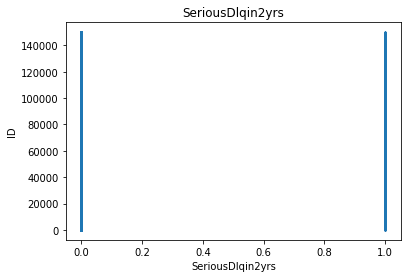

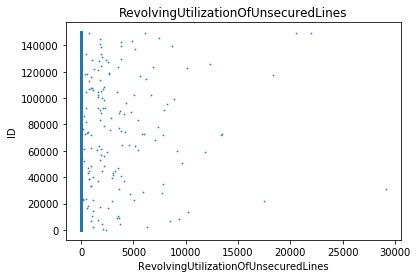

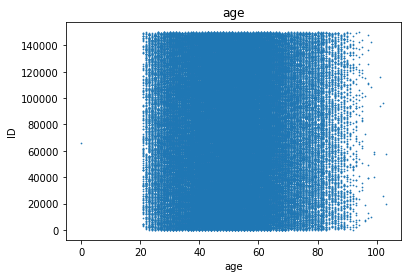

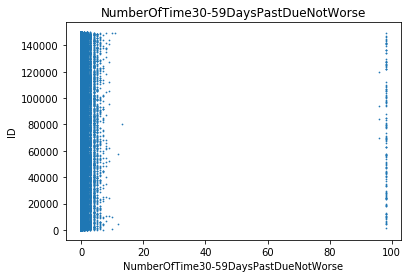

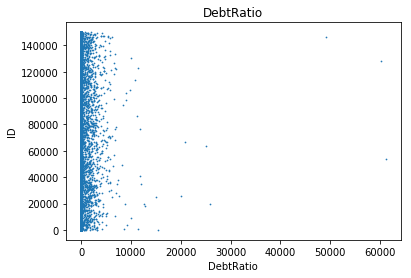

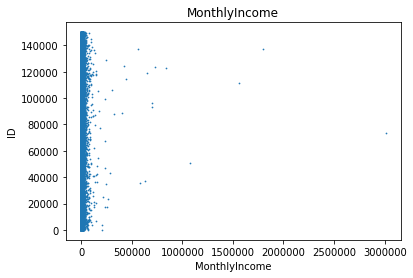

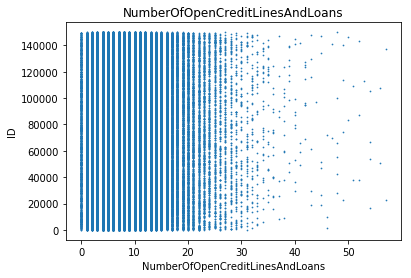

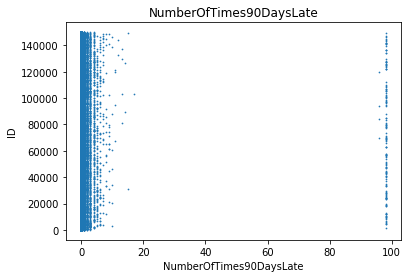

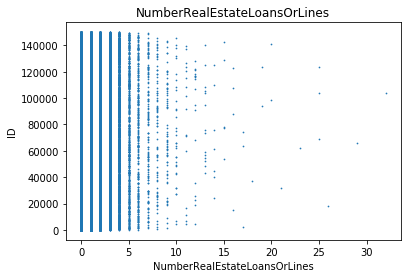

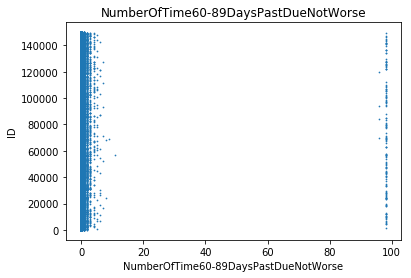

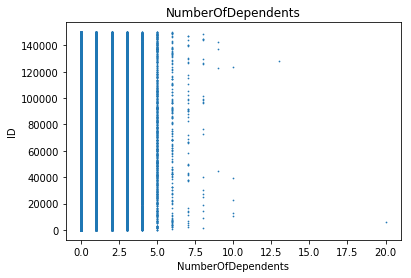

In [106]:
#A function to print every graph with the ID as 
def print_all_values():
    df1=df.drop('Unnamed: 0',axis=1)
    cols=df1.columns
    for col in cols:
        if (df[col].dtypes !='object'):

            fig1=plt.figure()
            ax1=plt.axes()
            plt.scatter(df[[col]],df['Unnamed: 0'],alpha=1,s=0.5)
            plt.title(col)
            ax1 = ax1.set(xlabel=col, ylabel='ID')
            plt.show()
            
            
print_all_values()


In [75]:
df=df[df.RevolvingUtilizationOfUnsecuredLines <30000]
df=df[df.DebtRatio <100000]
df=df[df.MonthlyIncome <15000000]
df=df[df.NumberRealEstateLoansOrLines <40]

In [77]:
df.fillna(df.median(), inplace=True)

In [78]:
df.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [107]:
X = df.drop('SeriousDlqin2yrs',axis=1)
y = df['SeriousDlqin2yrs']  

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


---------------------------------------------------------------------------------------------
#                 Algorithms of Machine Learning
----------------------------------------------------------------------------------------------

## Regression Logistic

In [108]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100,random_state=0)
logisticRegr.fit(X_train, y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
#ERROR
error = (1 - logisticRegr.score(X_test, y_test))*100
print('Score  = ',logisticRegr.score(X_test, y_test)*100, '%','\nError = %f' % error, '%')


Score  =  92.73301737756714 % 
Error = 7.266983 %


# Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=0)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [119]:
error = (1 - rf.score(X_test, y_test))*100
print('Score  = ',rf.score(X_test, y_test)*100, '%','\nErreur = %f' % error, '%')


Score  =  93.13211939802112 % 
Erreur = 6.867881 %


## Tree Decision Classifier

In [111]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [112]:
error = (1 - clf.score(X_test, y_test))*100
print('Score  = ',clf.score(X_test, y_test)*100, '%','\nErreur = %f' % error, '%')


Score  =  89.29491976386463 % 
Erreur = 10.705080 %


In [86]:
sample_entry.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [120]:
def CreditScore(age, income, Res):
    score = 0
    if age<30:
        score+=80
    elif 30<=age<=40:
        score+=130
    else:
        score+=150
   
    if income<10000:
        score+=50
    elif 10000<=income<=100000:
        score+=160
    else:
        score+=180
   
    if Res == 1:
        score+=130
    elif Res == 2:
        score+=110
    else:
        score+=90
   
    return score
   

print("Enter your age")
age = int(input())
print("\r")
print("Enter your income")
income = int(input())
print("\r")
print("Residential status")
print("1 for Owner & 2 for Tenant & 3 for With Parents")
Res = int(input())

Credit = CreditScore(age, income, Res)

if Credit >= 380:
    print("your credit is good")
else:
    print("your credit score is not sufficient")

Enter your age
38

Enter your income
70000

Residential status
1 for Owner & 2 for Tenant & 3 for With Parents
2
your credit is good
